In [ ]:
# CP1 Statistical_Data_analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from datetime import datetime, timedelta
import seaborn as sns
import gender_guesser.detector as gender

Are there variables that are particularly significant in terms of explaining the answer to your project question?

Are there significant differences between subgroups in your data that may be relevant to your project aim?

Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

What are the most appropriate tests to use to analyze these relationships?


In [26]:
df1=pd.read_csv ('Amazon.csv')

In [27]:
df=df1.drop(['Date','asin','helpful','reviewTime','reviewerID','summary'],axis=1)

In [28]:
pd.set_option('display.max_colwidth', -1)
df.head(4)

,overall,reviewText,reviewerName
0,2,"I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all.",AdrianaM
1,5,"I highly recommend this series. It is a must for anyone who is yearning to watch ""grown up"" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.",Carol T
2,1,"This one is a real snoozer. Don't believe anything you read or hear, it's awful. I had no idea what the title means. Neither will you.","Daniel Cooper ""dancoopermedia"""
3,4,Mysteries are interesting. The tension between Robson and the tall blond is good but not always believable. She often seemed uncomfortable.,"J. Kaplan ""JJ"""


In [29]:
d = gender.Detector(case_sensitive=False)

first_names = []
for i in range(0,36797):
    name = str(df.reviewerName.values[i]).split(' ', 1)[0]
    first_names.append(name)
    
genders = []
for i in first_names[0:len(first_names)]:
    if d.get_gender(i) == 'male':
        genders.append('male')
    elif d.get_gender(i) == 'mostly_male':
        genders.append('male')
    elif d.get_gender(i) == 'mostly_female':
        genders.append('female')
    elif d.get_gender(i) == 'female':
        genders.append('female')
    else:
        genders.append('unknown')

In [34]:
# df.insert(3, 'genders', genders) 

In [35]:
df.head(3)

,overall,reviewText,reviewerName,genders
0,2,"I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all.",AdrianaM,unknown
1,5,"I highly recommend this series. It is a must for anyone who is yearning to watch ""grown up"" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.",Carol T,female
2,1,"This one is a real snoozer. Don't believe anything you read or hear, it's awful. I had no idea what the title means. Neither will you.","Daniel Cooper ""dancoopermedia""",male


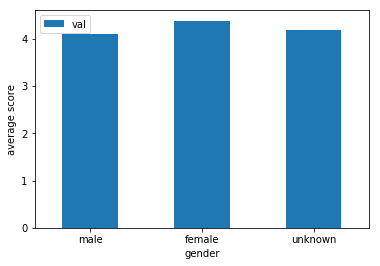

In [36]:
dfbar = pd.DataFrame({'gen':['male', 'female', 'unknown'], 
                      'val':[df[df.genders=='male'].overall.sum()/df[df.genders=='male'].genders.count(), 
                             df[df.genders=='female'].overall.sum()/df[df.genders=='female'].genders.count(), 
                             df[df.genders=='unknown'].overall.sum()/df[df.genders=='unknown'].genders.count()]})
dfbar.plot.bar(x='gen', y='val', rot=0)
plt.xlabel('gender')
plt.ylabel('average score')
plt.show()

In [25]:
# first idea -> the gender make difference
# second idea -> length of text make difference

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36797 entries, 0 to 36796
Data columns (total 4 columns):
overall         36797 non-null int64
reviewText      36797 non-null object
reviewerName    36797 non-null object
genders         36797 non-null object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [40]:
df.index=range(1,36798)

In [43]:
male = df.overall[df.genders == 'male']
female = df.overall[df.genders == 'female']
n_ma = len(male)
n_fe = len(female)

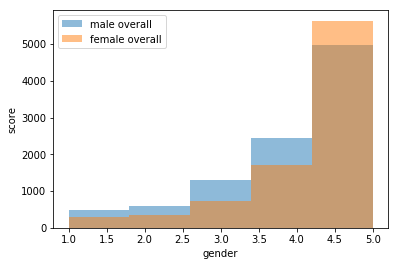

In [45]:
_ = plt.hist(male, bins=5, alpha=0.5, label='male overall')
_ = plt.hist(female, bins=5, alpha=0.5, label='female overall')
_ = plt.xlabel('gender')
_ = plt.ylabel('score')
_ = plt.legend()
plt.show()

In [46]:
np.random.seed(47)
N_rep = 10000

In [88]:
import scipy.stats as stats
stats.f_oneway(male, 
               female)

F_onewayResult(statistic=290.34862540539945, pvalue=1.3014566775902074e-64)

In [49]:
df2=pd.read_csv ('Amazon.csv',parse_dates=['Date'])
df=df2
df.head()

,Date,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary
0,2014-05-03,B000H00VBQ,"[0, 0]",2,"I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all.","05 3, 2014",A11N155CW1UV02,AdrianaM,A little bit boring for me
1,2012-09-03,B000H00VBQ,"[0, 0]",5,"I highly recommend this series. It is a must for anyone who is yearning to watch ""grown up"" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.","09 3, 2012",A3BC8O2KCL29V2,Carol T,Excellent Grown Up TV
2,2013-10-16,B000H00VBQ,"[0, 1]",1,"This one is a real snoozer. Don't believe anything you read or hear, it's awful. I had no idea what the title means. Neither will you.","10 16, 2013",A60D5HQFOTSOM,"Daniel Cooper ""dancoopermedia""",Way too boring for me
3,2013-10-30,B000H00VBQ,"[0, 0]",4,Mysteries are interesting. The tension between Robson and the tall blond is good but not always believable. She often seemed uncomfortable.,"10 30, 2013",A1RJPIGRSNX4PW,"J. Kaplan ""JJ""",Robson Green is mesmerizing
4,2009-02-11,B000H00VBQ,"[1, 1]",5,"This show always is excellent, as far as british crime or mystery showsgoes this is one of the best ever made. The stories are well done and the acting is top notch with interesting twists in the realistic and brutal storylines. This show pulls no punches as it enters into the twisted minds of criminals and the profiler psychiatrist who helps out in a northern english city police force. The show looks like it is shot in Manchester but it is called by another name in the show. One episode is not on this disc the excellent 'prayer of the bone"" which is on a seperate disc. Still crime shows don't get much better than this one on either side of the ocean. It's just a great show that never has had a less than well made episode. Unfortunately like all British shows you only get about five shows a year , but these are an hour and a half shows , still one could hope for at least 8 of these a year. The realism and depth of the main character Tony Hill as protrayed by the excellent Robson Green is well worth viewing because he just makes this role truly part of himself in everyway. I bet he went to crime scenes even in real life to research his role. But the writers too must be applauded for their way above average stories. Lets hope this show continues on for many years to come.","02 11, 2009",A16XRPF40679KG,Michael Dobey,Robson green and great writing


In [50]:
df.index = df['Date']
df.head()

,Date,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary
Date,,,,,,,,,
2014-05-03,2014-05-03,B000H00VBQ,"[0, 0]",2,"I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all.","05 3, 2014",A11N155CW1UV02,AdrianaM,A little bit boring for me
2012-09-03,2012-09-03,B000H00VBQ,"[0, 0]",5,"I highly recommend this series. It is a must for anyone who is yearning to watch ""grown up"" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.","09 3, 2012",A3BC8O2KCL29V2,Carol T,Excellent Grown Up TV
2013-10-16,2013-10-16,B000H00VBQ,"[0, 1]",1,"This one is a real snoozer. Don't believe anything you read or hear, it's awful. I had no idea what the title means. Neither will you.","10 16, 2013",A60D5HQFOTSOM,"Daniel Cooper ""dancoopermedia""",Way too boring for me
2013-10-30,2013-10-30,B000H00VBQ,"[0, 0]",4,Mysteries are interesting. The tension between Robson and the tall blond is good but not always believable. She often seemed uncomfortable.,"10 30, 2013",A1RJPIGRSNX4PW,"J. Kaplan ""JJ""",Robson Green is mesmerizing
2009-02-11,2009-02-11,B000H00VBQ,"[1, 1]",5,"This show always is excellent, as far as british crime or mystery showsgoes this is one of the best ever made. The stories are well done and the acting is top notch with interesting twists in the realistic and brutal storylines. This show pulls no punches as it enters into the twisted minds of criminals and the profiler psychiatrist who helps out in a northern english city police force. The show looks like it is shot in Manchester but it is called by another name in the show. One episode is not on this disc the excellent 'prayer of the bone"" which is on a seperate disc. Still crime shows don't get much better than this one on either side of the ocean. It's just a great show that never has had a less than well made episode. Unfortunately like all British shows you only get about five shows a year , but these are an hour and a half shows , still one could hope for at least 8 of these a year. The realism and depth of the main character Tony Hill as protrayed by the excellent Robson Green is well worth viewing because he just makes this role truly part of himself in everyway. I bet he went to crime scenes even in real life to research his role. But the writers too must be applauded for their way above average stories. Lets hope this show continues on for many years to come.","02 11, 2009",A16XRPF40679KG,Michael Dobey,Robson green and great writing


In [51]:
def date_string(x):
    return x.strftime('%Y%m%d')

In [52]:
df['Date'] = df['Date'].apply(date_string)

In [53]:
agg = df[['overall']]
agg.head()

,overall
Date,
2014-05-03,2
2012-09-03,5
2013-10-16,1
2013-10-30,4
2009-02-11,5


In [54]:
data=agg.resample('M').mean()
len(data)

165

In [56]:
data.head()

,overall
Date,
2000-11-30,5.0
2000-12-31,NaN
2001-01-31,NaN
2001-02-28,NaN
2001-03-31,NaN


In [61]:
data.insert(0, 'Date', data.index) 

In [62]:
data.head()

,Date,overall
Date,,
2000-11-30,2000-11-30,5.0
2000-12-31,2000-12-31,NaN
2001-01-31,2001-01-31,NaN
2001-02-28,2001-02-28,NaN
2001-03-31,2001-03-31,NaN


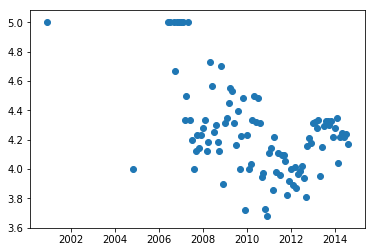

In [64]:
plt.scatter(data.index,data.overall)
plt.show()

In [66]:
x=data.index.map(pd.Timestamp.timestamp).to_series()
sns.regplot(x, data.overall, data=data,fit_reg = True)

/Users/mac/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


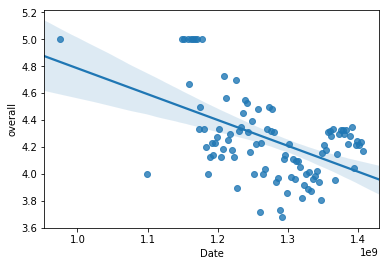

In [67]:
plt.show()

In [68]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/mac/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2000-11-30 to 2014-07-31
Freq: M
Data columns (total 2 columns):
Date       165 non-null datetime64[ns]
overall    100 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [142]:
data1=data.dropna()
data1.head()

,Date,overall
Date,,
2000-11-30,2000-11-30,5.0
2004-10-31,2004-10-31,4.0
2006-05-31,2006-05-31,5.0
2006-06-30,2006-06-30,5.0
2006-08-31,2006-08-31,5.0


In [122]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [126]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2000-11-30 to 2014-07-31
Data columns (total 3 columns):
Date       100 non-null datetime64[ns]
overall    100 non-null float64
Datenum    100 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.1 KB


In [138]:
datenum=[]
for i in range (100):
    datenum.append((data1.Date[i] - data1.Date[0]).days+1)
    

In [139]:
print(datenum)

[1, 1432, 2009, 2039, 2101, 2131, 2162, 2192, 2223, 2254, 2282, 2313, 2343, 2374, 2404, 2435, 2466, 2496, 2527, 2557, 2588, 2619, 2648, 2679, 2709, 2740, 2770, 2801, 2832, 2862, 2893, 2923, 2954, 2985, 3013, 3044, 3074, 3105, 3135, 3166, 3197, 3227, 3258, 3288, 3319, 3350, 3378, 3409, 3439, 3470, 3500, 3531, 3562, 3592, 3623, 3653, 3684, 3715, 3743, 3774, 3804, 3835, 3865, 3896, 3927, 3957, 3988, 4018, 4049, 4080, 4109, 4140, 4170, 4201, 4231, 4262, 4293, 4323, 4354, 4384, 4415, 4446, 4474, 4505, 4535, 4566, 4596, 4627, 4658, 4688, 4719, 4749, 4780, 4811, 4839, 4870, 4900, 4931, 4961, 4992]


In [143]:
data1.insert(2, 'Datenum', datenum) 

In [144]:
data1.head()

,Date,overall,Datenum
Date,,,
2000-11-30,2000-11-30,5.0,1
2004-10-31,2004-10-31,4.0,1432
2006-05-31,2006-05-31,5.0,2009
2006-06-30,2006-06-30,5.0,2039
2006-08-31,2006-08-31,5.0,2101


/Users/mac/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


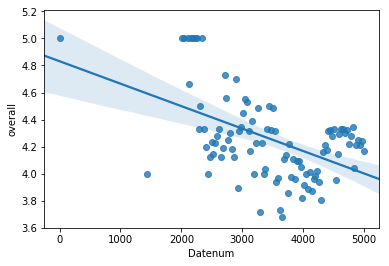

In [145]:
sns.regplot(data1.Datenum, data1.overall, data=data1,fit_reg = True)
plt.show()

In [146]:
m = ols('overall ~ Datenum',data1).fit()

In [147]:
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     33.27
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           9.34e-08
Time:                        19:02:01   Log-Likelihood:                -10.455
No. Observations:                 100   AIC:                             24.91
Df Residuals:                      98   BIC:                             30.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8312      0.103     46.894      0.0

In [ ]:
# not linear